In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [2]:
%matplotlib inline

In [3]:
df_properties = pd.read_csv("properties_2016.csv/properties_2016.csv")
df_train = pd.read_csv("train_2016_v2.csv/train_2016_v2.csv")

/home/vaibhav/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_merge = pd.merge(df_properties, df_train, on='parcelid', how='right')

In [5]:
df_merge.shape

(90275, 60)

In [6]:
df_merge.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [7]:
df_merge_filtered_cols = df_merge.dropna(axis=1, how='all')

In [8]:
df_merge_filtered_cols.shape

(90275, 60)

In [9]:
column = df_merge_filtered_cols.columns.difference(['parcelid', 'logerror', 'transactiondate'])

In [10]:
subset_cols = list(column.values)

In [11]:
df_merge_filtered_rows = df_merge_filtered_cols.dropna(axis=0, how='all', subset=subset_cols)

In [12]:
df_merge_filtered_rows.shape

(90275, 60)

In [18]:
df_properties.shape
print(df_properties.isnull().sum())
df_merge_filtered_rows.shape
print(df_merge_filtered_rows.isnull().sum())

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [19]:
filter_column = df_merge_filtered_rows.columns.difference(['parcelid', 'logerror', 'transactiondate'])
col_list = list(filter_column.values)

In [20]:
for i in col_list:
    cols = []
    log_cols = []
    for index, row in df_merge_filtered_rows.iterrows():
        if(np.isnan(row[i]) == False):
            cols.append(row[i])
            log_cols.append(row['logerror'])
    x = np.array(cols)
    y = np.array(log_cols)
    r_row, p_value = pearsonr(x, y)
    print("col1 is: ", i , " and col2 is: logerror and r_row is: " , r_row , " and p_value is: " , p_value)

col1 is:  airconditioningtypeid  and col2 is: logerror and r_row is:  0.00517889390701  and p_value is:  0.379637064329
col1 is:  architecturalstyletypeid  and col2 is: logerror and r_row is:  -0.00427593242783  and p_value is:  0.945189777772


/home/vaibhav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


col1 is:  assessmentyear  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  basementsqft  and col2 is: logerror and r_row is:  0.253394675923  and p_value is:  0.101101033187
col1 is:  bathroomcnt  and col2 is: logerror and r_row is:  0.0278892865508  and p_value is:  5.2447414069e-17
col1 is:  bedroomcnt  and col2 is: logerror and r_row is:  0.025467090071  and p_value is:  1.96457453213e-14
col1 is:  buildingclasstypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  buildingqualitytypeid  and col2 is: logerror and r_row is:  -0.00957301808937  and p_value is:  0.0218586381646
col1 is:  calculatedbathnbr  and col2 is: logerror and r_row is:  0.0294476853167  and p_value is:  1.47627650281e-18
col1 is:  calculatedfinishedsquarefeet  and col2 is: logerror and r_row is:  0.0387840689218  and p_value is:  3.48019084774e-31
col1 is:  censustractandblock  and col2 is: logerror and r_row is:  0.00889216319796  and p_value is:  0.0077500528463

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
delete_cols = []
for i in df_merge_filtered_rows.columns:
    if(df_merge_filtered_rows[i].dtype != np.float64 and df_merge_filtered_rows[i].dtype != np.int64):
        delete_cols.append(i)
        print(i)
df_merge_filtered_rows.drop(delete_cols, axis=1)

hashottuborspa
propertycountylandusecode
propertyzoningdesc
fireplaceflag
taxdelinquencyflag
transactiondate


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,6.111002e+13,0.0953
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,6.111002e+13,0.0198
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,NaN,6.111001e+13,0.0060
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,NaN,6.111001e+13,-0.0566
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,6.111001e+13,0.0573
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,...,1980.0,2.0,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,6.111005e+13,0.0564
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1978.0,1.0,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,6.111006e+13,0.0315
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,1971.0,2.0,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,6.111006e+13,0.0257
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1979.0,1.0,231297.0,462594.0,2015.0,231297.0,5026.40,NaN,6.111005e+13,0.0020
9,17167359,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,1950.0,1.0,134251.0,268502.0,2015.0,134251.0,3217.06,NaN,6.111004e+13,-0.0576


In [22]:
filter_column = df_merge_filtered_rows.columns.difference(['parcelid', 'logerror', 'transactiondate'])

In [23]:
col_list = list(filter_column.values)

In [24]:
for i in col_list:
    cols = []
    log_cols = []
    for index, row in df_merge_filtered_rows.iterrows():
        if(np.isnan(row[i]) == False):
            cols.append(row[i])
            log_cols.append(row['logerror'])
    x = np.array(cols)
    y = np.array(log_cols)
    r_row, p_value = pearsonr(x, y)
    print("col1 is: ", i , " and col2 is: logerror and r_row is: " , r_row , " and p_value is: " , p_value)

col1 is:  airconditioningtypeid  and col2 is: logerror and r_row is:  0.00517889390701  and p_value is:  0.379637064329
col1 is:  architecturalstyletypeid  and col2 is: logerror and r_row is:  -0.00427593242783  and p_value is:  0.945189777772


/home/vaibhav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


col1 is:  assessmentyear  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  basementsqft  and col2 is: logerror and r_row is:  0.253394675923  and p_value is:  0.101101033187
col1 is:  bathroomcnt  and col2 is: logerror and r_row is:  0.0278892865508  and p_value is:  5.2447414069e-17
col1 is:  bedroomcnt  and col2 is: logerror and r_row is:  0.025467090071  and p_value is:  1.96457453213e-14
col1 is:  buildingclasstypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  buildingqualitytypeid  and col2 is: logerror and r_row is:  -0.00957301808937  and p_value is:  0.0218586381646
col1 is:  calculatedbathnbr  and col2 is: logerror and r_row is:  0.0294476853167  and p_value is:  1.47627650281e-18
col1 is:  calculatedfinishedsquarefeet  and col2 is: logerror and r_row is:  0.0387840689218  and p_value is:  3.48019084774e-31
col1 is:  censustractandblock  and col2 is: logerror and r_row is:  0.00889216319796  and p_value is:  0.0077500528463

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
df_merge_filtered_rows.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [25]:
delete_cols = []
for i in df_merge_filtered_rows.columns:
    if(df_merge_filtered_rows[i].dtype != np.float64 and df_merge_filtered_rows[i].dtype != np.int64):
        delete_cols.append(i)
        print(i)
df_merge_filtered_rows.drop(delete_cols, axis=1, inplace=True)

hashottuborspa
propertycountylandusecode
propertyzoningdesc
fireplaceflag
taxdelinquencyflag
transactiondate


In [28]:
df_merge_filtered_rows.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt

In [30]:
filter_column = df_merge_filtered_rows.columns.difference(['parcelid', 'fireplaceflag', 'logerror', 'transactiondate'])
col_list  = list(filter_column.values)
for i in col_list:
    cols = []
    log_cols = []
    for index, row in df_merge_filtered_rows.iterrows():
        if(np.isnan(row[i]) == False):
            cols.append(row[i])
            log_cols.append(row['logerror'])
    x = np.array(cols)
    y = np.array(log_cols)
    r_row, p_value = pearsonr(x, y)
    print("col1 is: ", i , " and col2 is: logerror and r_row is: " , r_row , " and p_value is: " , p_value)

col1 is:  airconditioningtypeid  and col2 is: logerror and r_row is:  0.00517889390701  and p_value is:  0.379637064329
col1 is:  architecturalstyletypeid  and col2 is: logerror and r_row is:  -0.00427593242783  and p_value is:  0.945189777772


/home/vaibhav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


col1 is:  assessmentyear  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  basementsqft  and col2 is: logerror and r_row is:  0.253394675923  and p_value is:  0.101101033187
col1 is:  bathroomcnt  and col2 is: logerror and r_row is:  0.0278892865508  and p_value is:  5.2447414069e-17
col1 is:  bedroomcnt  and col2 is: logerror and r_row is:  0.025467090071  and p_value is:  1.96457453213e-14
col1 is:  buildingclasstypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  buildingqualitytypeid  and col2 is: logerror and r_row is:  -0.00957301808937  and p_value is:  0.0218586381646
col1 is:  calculatedbathnbr  and col2 is: logerror and r_row is:  0.0294476853167  and p_value is:  1.47627650281e-18
col1 is:  calculatedfinishedsquarefeet  and col2 is: logerror and r_row is:  0.0387840689218  and p_value is:  3.48019084774e-31
col1 is:  censustractandblock  and col2 is: logerror and r_row is:  0.00889216319796  and p_value is:  0.0077500528463

In [32]:
df_merge_filtered_rows.mean(axis=0)

parcelid                        1.298466e+07
airconditioningtypeid           1.816372e+00
architecturalstyletypeid        7.229885e+00
basementsqft                    7.135814e+02
bathroomcnt                     2.279474e+00
bedroomcnt                      3.031869e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           5.565407e+00
calculatedbathnbr               2.309216e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.347974e+03
calculatedfinishedsquarefeet    1.773186e+03
finishedsquarefeet12            1.745455e+03
finishedsquarefeet13            1.404545e+03
finishedsquarefeet15            2.380090e+03
finishedsquarefeet50            1.355547e+03
finishedsquarefeet6             2.302546e+03
fips                            6.048871e+03
fireplacecnt                    1.187884e+00
fullbathcnt                     2.241231e+00
garagecarcnt                    1.812005e+00
garagetotalsqft                 3.455212e+02
heatingors

In [28]:
col_list = list(filter_column.values)

In [63]:
pearson_list = []
for i in col_list:
    cols = []
    log_cols = []
    for index, row in df_merge_filtered_rows.iterrows():
        if(np.isnan(row[i]) == False):
            cols.append(row[i])
            log_cols.append(row['logerror'])
    x = np.array(cols)
    if(all(x != 0)):
        y = np.array(log_cols)
        r_row, p_value = pearsonr(x, y)
        result = [i, 'logerror', r_row, p_value]
        pearson_list.append(result);
        #print(pearson_list)
        print("col1 is: ", i , " and col2 is: logerror and r_row is: " , r_row , " and p_value is: " , p_value)

col1 is:  airconditioningtypeid  and col2 is: logerror and r_row is:  0.00517889390701  and p_value is:  0.379637064329
col1 is:  architecturalstyletypeid  and col2 is: logerror and r_row is:  -0.00427593242783  and p_value is:  0.945189777772


/home/vaibhav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


col1 is:  assessmentyear  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  basementsqft  and col2 is: logerror and r_row is:  0.253394675923  and p_value is:  0.101101033187
col1 is:  buildingclasstypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  buildingqualitytypeid  and col2 is: logerror and r_row is:  -0.00957301808937  and p_value is:  0.0218586381646
col1 is:  calculatedbathnbr  and col2 is: logerror and r_row is:  0.0294476853167  and p_value is:  1.47627650281e-18
col1 is:  calculatedfinishedsquarefeet  and col2 is: logerror and r_row is:  0.0387840689218  and p_value is:  3.48019084774e-31
col1 is:  censustractandblock  and col2 is: logerror and r_row is:  0.00889216319796  and p_value is:  0.0077500528463
col1 is:  decktypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  finishedfloor1squarefeet  and col2 is: logerror and r_row is:  0.0262417258925  and p_value is:  0.0297940019085
col1 is:  fi

In [31]:
df_merge_filtered_rows

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,6.111002e+13,0.0953
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,6.111002e+13,0.0198
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,NaN,6.111001e+13,0.0060
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,NaN,6.111001e+13,-0.0566
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,6.111001e+13,0.0573
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,...,1980.0,2.0,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,6.111005e+13,0.0564
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1978.0,1.0,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,6.111006e+13,0.0315
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,1971.0,2.0,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,6.111006e+13,0.0257
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1979.0,1.0,231297.0,462594.0,2015.0,231297.0,5026.40,NaN,6.111005e+13,0.0020
9,17167359,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,1950.0,1.0,134251.0,268502.0,2015.0,134251.0,3217.06,NaN,6.111004e+13,-0.0576


In [32]:
df_merge_filtered_rows.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt

In [33]:
interesting_df = df_merge_filtered_rows[['logerror', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'garagecarcnt', 'lotsizesquarefeet', 'numberofstories', 'yearbuilt', 'unitcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt']]

In [34]:
interesting_df.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'garagecarcnt',
       'lotsizesquarefeet', 'numberofstories', 'yearbuilt', 'unitcnt',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'taxvaluedollarcnt'],
      dtype='object')

In [35]:
interesting_df.head()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,garagecarcnt,lotsizesquarefeet,numberofstories,yearbuilt,unitcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt
0,0.0953,2.5,3.0,NaN,1264.0,1264.0,2.0,1735.0,2.0,1986.0,NaN,115087.0,76724.0,191811.0
1,0.0198,1.0,2.0,NaN,777.0,777.0,1.0,NaN,1.0,1990.0,NaN,143809.0,95870.0,239679.0
2,0.0060,2.0,3.0,NaN,1101.0,1101.0,2.0,6569.0,1.0,1956.0,NaN,33619.0,14234.0,47853.0
3,-0.0566,1.5,2.0,NaN,1554.0,1554.0,2.0,7400.0,1.0,1965.0,NaN,45609.0,17305.0,62914.0
4,0.0573,2.5,4.0,NaN,2415.0,2415.0,2.0,6326.0,2.0,1984.0,NaN,277000.0,277000.0,554000.0


In [36]:
pearson_relation_interesting_list = []
interesting_col_list = list(interesting_df.columns.values)

In [37]:
interesting_col_list

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'garagecarcnt',
 'lotsizesquarefeet',
 'numberofstories',
 'yearbuilt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxvaluedollarcnt']

In [38]:
interesting_df_corr = interesting_df.corr()
interesting_df_corr
#length = len(interesting_col_list)
#for i in range(0, length-1):
#    for j in range(i+1, length):
#            cols1 = []
#            cols2 = []
#            for index, row in interesting_df.iterrows():
#                if((np.isnan(row[interesting_col_list[i]]) == False) and (np.isnan(row[interesting_col_list[j]]) == False)):
#                    cols1.append(row[interesting_col_list[i]])
#                    cols2.append(row[interesting_col_list[j]])
#            x = np.array(cols1)
#            y = np.array(cols2)
#            r_row, p_value = pearsonr(x, y)
#            result = [i, j, r_row, p_value]
#            pearson__relation_interesting_list.append(result);
#            print("col1 is: ", interesting_col_list[i] , " and col2 is: " , interesting_col_list[j], " and r_row is: " , r_row , " and p_value is: " , p_value)

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,garagecarcnt,lotsizesquarefeet,numberofstories,yearbuilt,unitcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt
logerror,1.000000,0.027889,0.025467,-0.009573,0.038784,0.041922,0.026531,0.004835,0.013075,0.017312,-0.003983,0.022085,-0.003051,0.006508
bathroomcnt,0.027889,1.000000,0.646120,-0.259748,0.772553,0.799372,0.502429,-0.000197,0.320834,0.368061,0.119038,0.586641,0.353806,0.476363
bedroomcnt,0.025467,0.646120,1.000000,-0.025736,0.632035,0.657599,0.432115,-0.113984,0.150591,0.040871,0.180838,0.305405,0.173205,0.241329
buildingqualitytypeid,-0.009573,-0.259748,-0.025736,1.000000,-0.158691,-0.196411,NaN,-0.086515,0.388514,-0.424891,0.079702,-0.105382,-0.011348,-0.046708
calculatedfinishedsquarefeet,0.038784,0.772553,0.632035,-0.158691,1.000000,1.000000,0.506166,-0.048770,0.346964,0.211641,0.146178,0.716489,0.458550,0.600018
finishedsquarefeet12,0.041922,0.799372,0.657599,-0.196411,1.000000,1.000000,0.553059,-0.046706,0.341128,0.258530,0.003358,0.744048,0.480463,0.626052
garagecarcnt,0.026531,0.502429,0.432115,NaN,0.506166,0.553059,1.000000,0.231269,0.107244,0.196209,-0.182243,0.473109,0.250369,0.363972
lotsizesquarefeet,0.004835,-0.000197,-0.113984,-0.086515,-0.048770,-0.046706,0.231269,1.000000,-0.005338,0.118078,-0.028587,0.008655,-0.034030,-0.021347
numberofstories,0.013075,0.320834,0.150591,0.388514,0.346964,0.341128,0.107244,-0.005338,1.000000,0.331381,0.306778,0.222953,0.087028,0.141014
yearbuilt,0.017312,0.368061,0.040871,-0.424891,0.211641,0.258530,0.196209,0.118078,0.331381,1.000000,-0.100207,0.299696,0.039493,0.140940


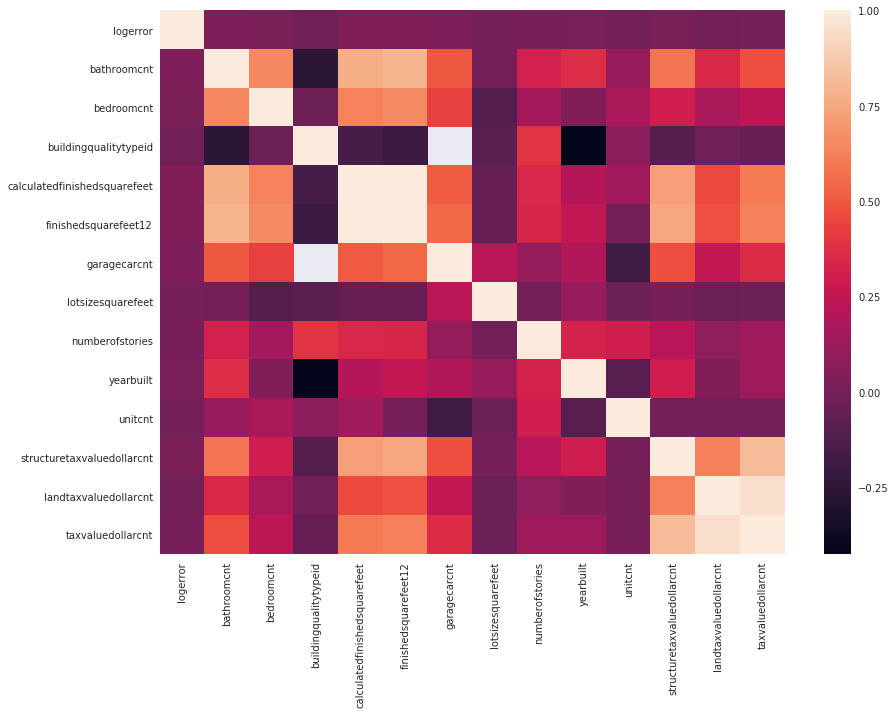

In [40]:
sns.set()
plt.figure(figsize=(14, 10))
heatmap_interesting_vars = sns.heatmap(interesting_df_corr)

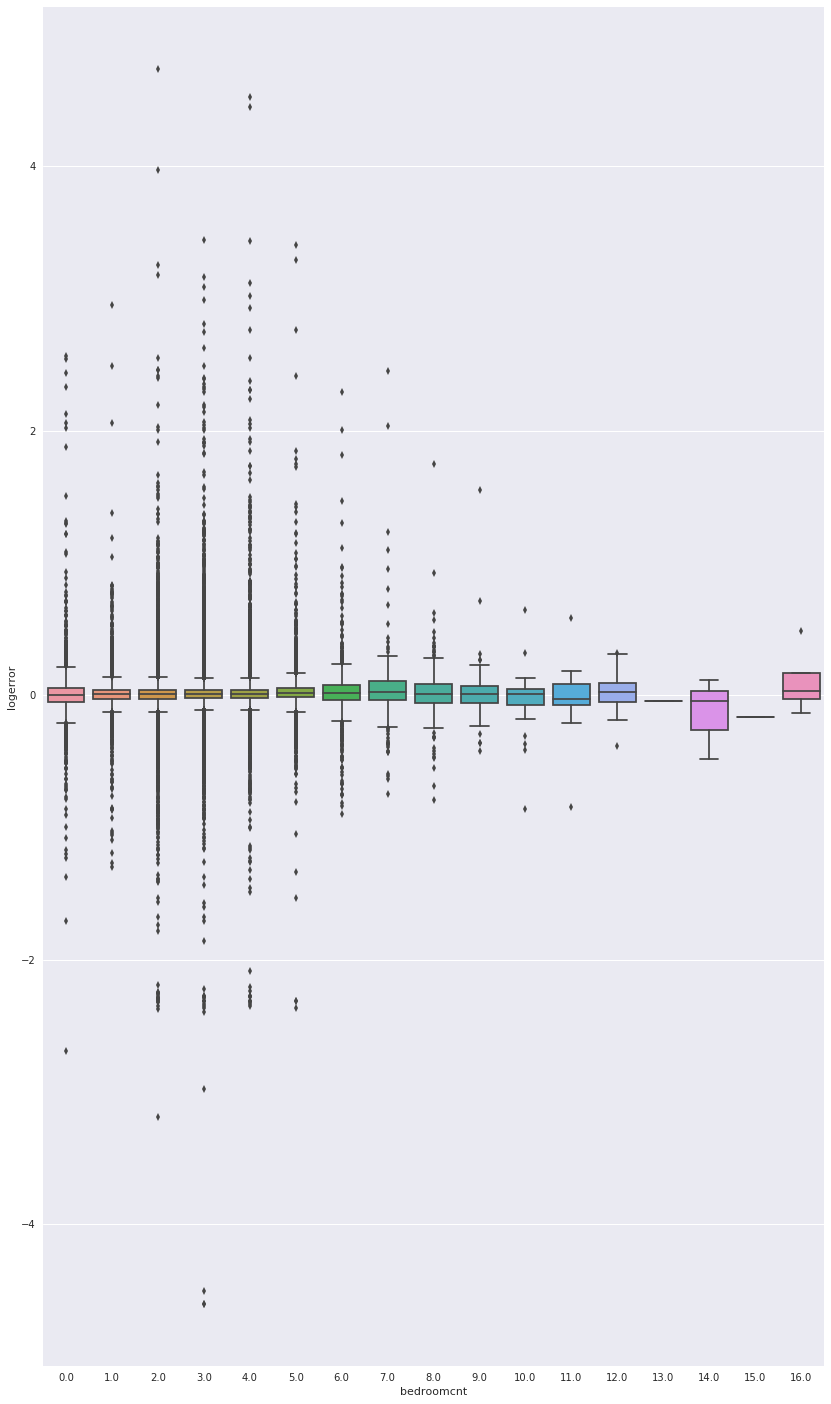

In [101]:
sns.set()
plt.figure(figsize=(14, 25))
ax = sns.boxplot(x="bedroomcnt", y="logerror", data=df_merge)

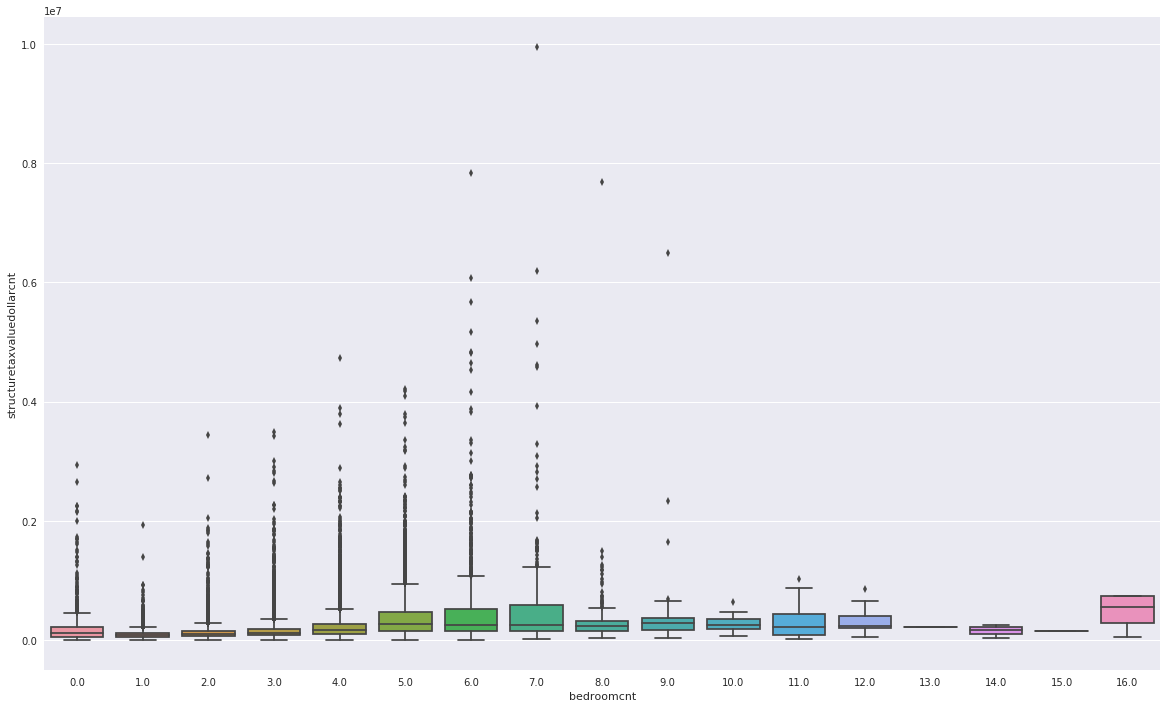

In [107]:
sns.set()
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x="bedroomcnt", y="structuretaxvaluedollarcnt", data=df_merge)


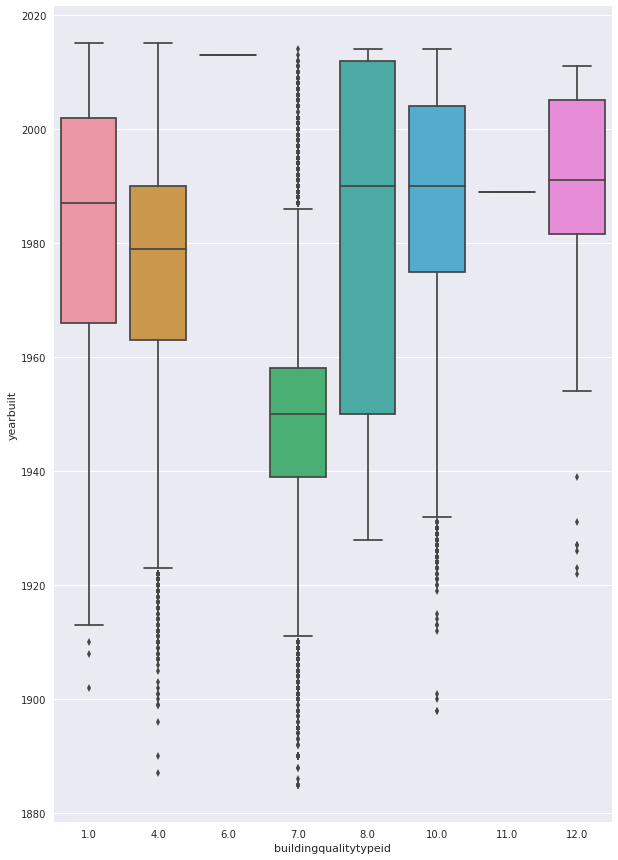

In [112]:
sns.set()
plt.figure(figsize=(10, 15))
ax = sns.boxplot(x="buildingqualitytypeid", y="yearbuilt", data=df_merge)

1
2
3
4
5
6
7
8
9
10
11
12
[0.015869524100061014, 0.016082125375019737, 0.0098667591308368007, 0.0066054881323166139, 0.0069258809356490311, 0.0071722395165720564, 0.011687302704332965, 0.011572814051164568, 0.016255362924281987, 0.016341631504922644, 0.01451013143483023, 0.019122311673375504]


/home/vaibhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


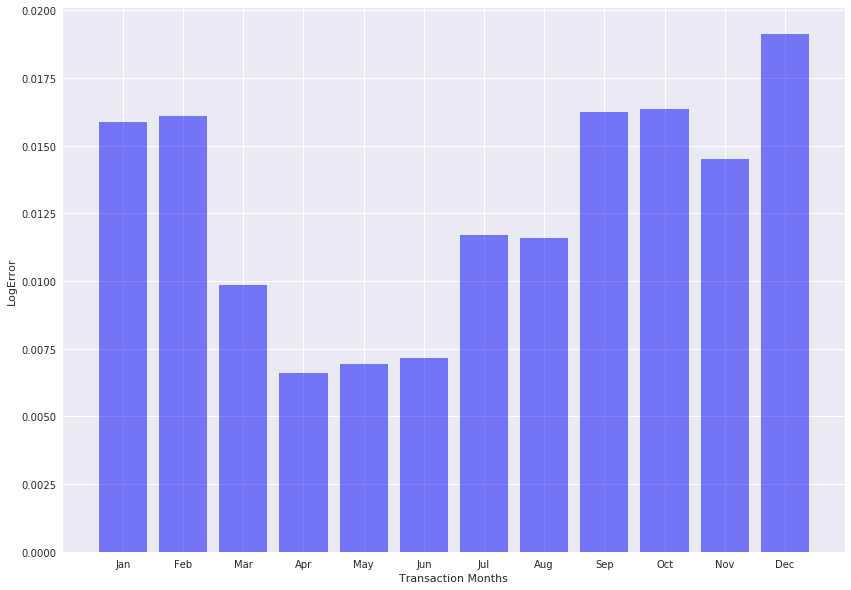

In [93]:
import numpy as np
import matplotlib.pyplot as plt
d = df_merge.groupby(pd.to_datetime(df_merge['transactiondate']).dt.month)['logerror']
log_error_list = []
for name, group in d:
    print(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(np.mean(temp_list))
print(log_error_list)  

f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
ax1.bar(range(len(log_error_list)), log_error_list, alpha=0.5, color='b')
plt.sca(ax1)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_ylabel("LogError")
ax1.set_xlabel("Transaction Months")
plt.legend(loc="upper right")
plt.show()

In [62]:
print(d)

In [63]:
import seaborn as sns

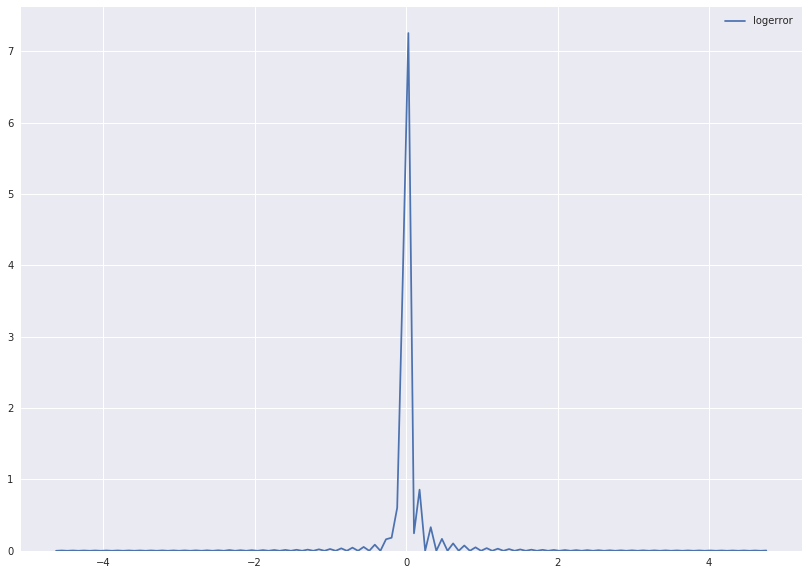

In [66]:
sns.set()
plt.figure(figsize=(14, 10))
sns.kdeplot(df_merge['logerror'])

In [94]:
df_merge['yearbuilt'].isnull().sum()

756

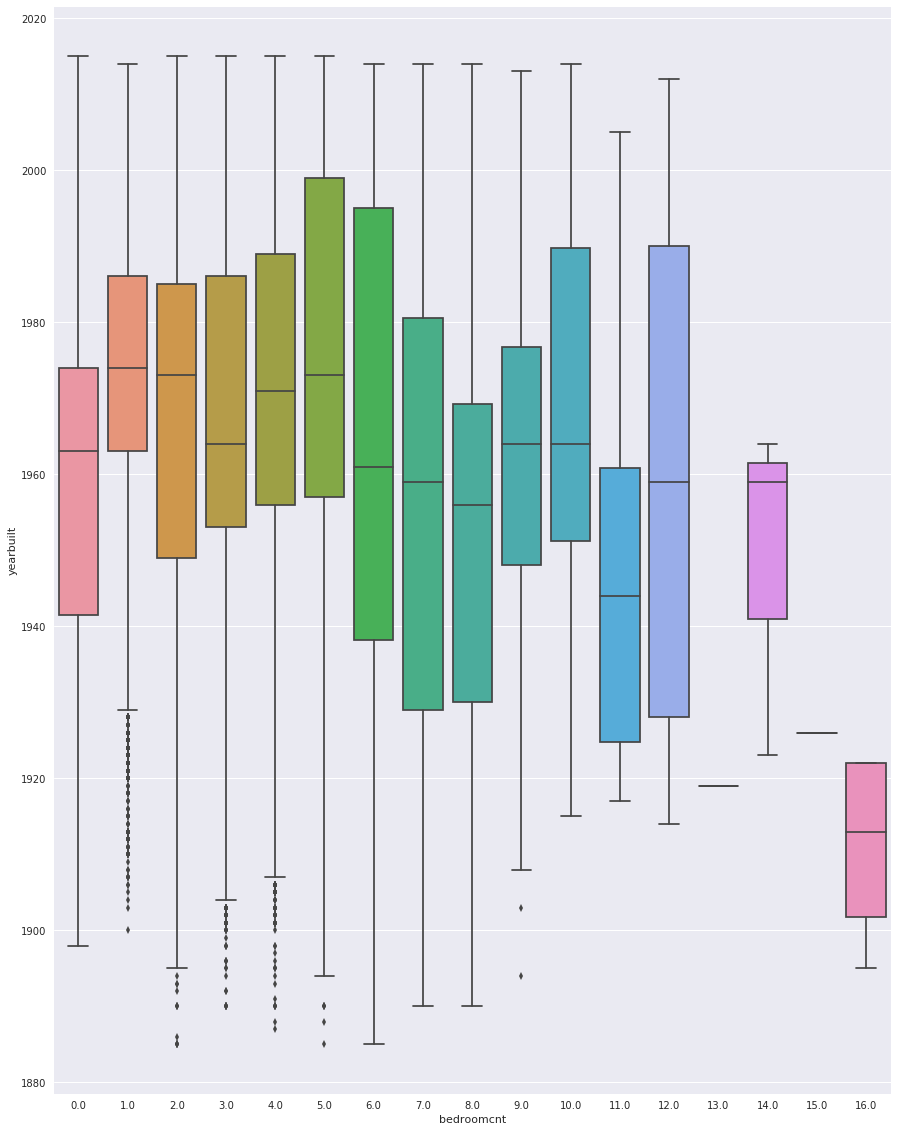

In [113]:
sns.set()
plt.figure(figsize=(15, 20))
ax = sns.boxplot(x="bedroomcnt", y="yearbuilt", data=df_merge)

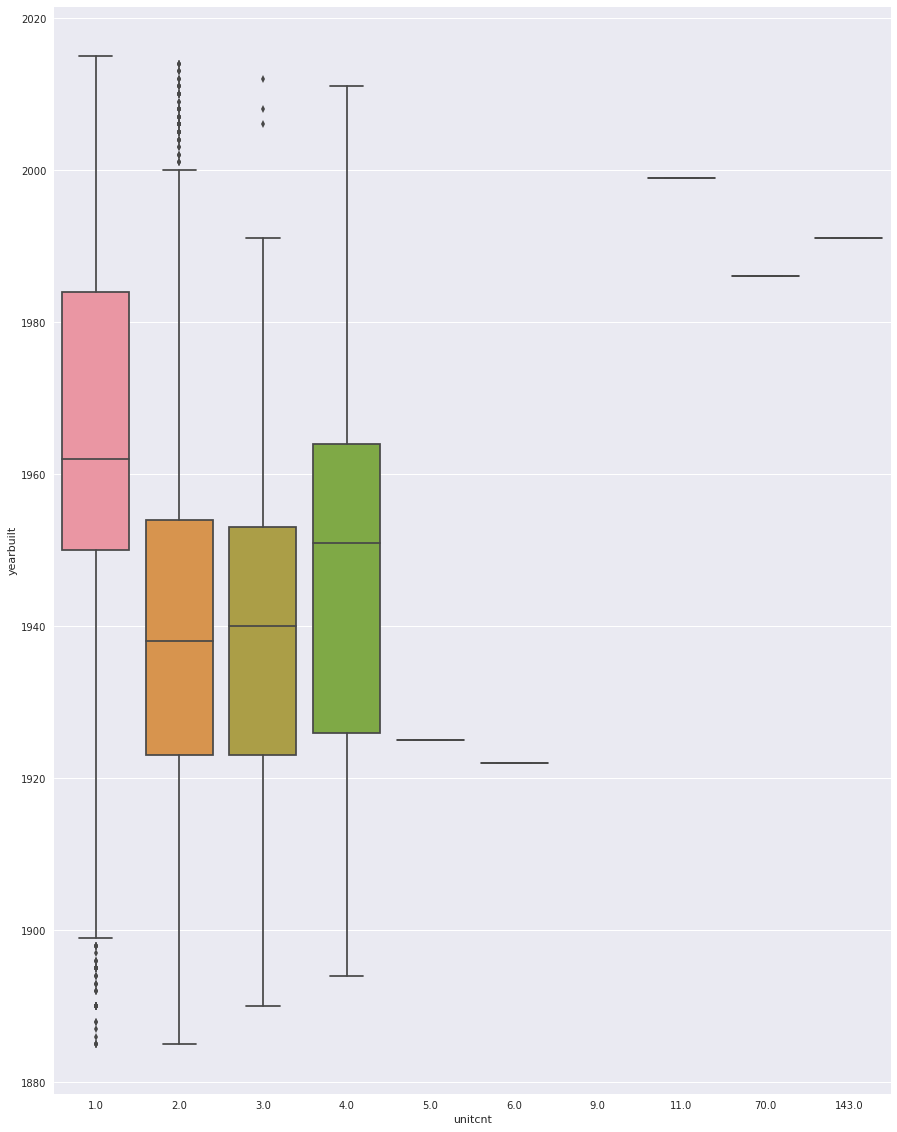

In [114]:
sns.set()
plt.figure(figsize=(15, 20))
ax = sns.boxplot(x="unitcnt", y="yearbuilt", data=df_merge)

In [115]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [116]:
df_merge.to_csv("merge_df.csv", index=False, encoding='utf-8')

In [117]:
import numpy as np

In [140]:
df_linear_reg = df_merge[['finishedsquarefeet12', 'logerror']]
df_final_reg = df_linear_reg[df_linear_reg.finishedsquarefeet12.notnull()]
df_final_reg

,finishedsquarefeet12,logerror
0,1264.0,0.0953
1,777.0,0.0198
2,1101.0,0.0060
3,1554.0,-0.0566
4,2415.0,0.0573
5,2882.0,0.0564
6,1772.0,0.0315
7,2632.0,0.0257
8,1292.0,0.0020
9,1385.0,-0.0576


In [149]:
y = df_final_reg['logerror'].as_matrix()
len(y)
df_finished_square_feet = df_final_reg['finishedsquarefeet12']
df_finished_square_feet

0        1264.0
1         777.0
2        1101.0
3        1554.0
4        2415.0
5        2882.0
6        1772.0
7        2632.0
8        1292.0
9        1385.0
10       1260.0
11       2735.0
12       2085.0
13       1508.0
14       1958.0
15       1687.0
16       2232.0
17        834.0
18       1361.0
19        917.0
20        907.0
21       2524.0
22       2400.0
23       2113.0
24       2297.0
25       1996.0
26       2445.0
27       1160.0
28       1570.0
29       2863.0
          ...  
90245    3568.0
90246    1656.0
90247    1450.0
90248    1240.0
90249    2972.0
90250    1456.0
90251    1252.0
90252    1680.0
90253    3096.0
90254    1110.0
90255     728.0
90256    3308.0
90257    1440.0
90258    1550.0
90259     860.0
90260    2781.0
90261    1432.0
90262    2140.0
90263    1060.0
90264     918.0
90265    1492.0
90266    1771.0
90267    1638.0
90268    1308.0
90269    1713.0
90270    2068.0
90271    1352.0
90272     860.0
90273    2268.0
90274    1812.0
Name: finishedsquarefeet

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_final_reg, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(77036, 2) (77036,)
(8560, 2) (8560,)


In [156]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

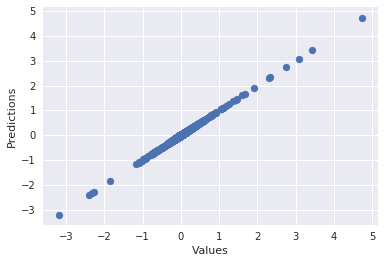

In [157]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('Values')
plt.ylabel('Predictions')

In [158]:
print('Score:', model.score(X_test, y_test))

Score: 1.0


In [291]:
df_linear_reg = df_merge[['yearbuilt', 'finishedsquarefeet12','structuretaxvaluedollarcnt','logerror']]
df_final_reg = df_linear_reg[df_linear_reg.yearbuilt.notnull()]
df_final_reg = df_final_reg[df_final_reg.finishedsquarefeet12.notnull()]
df_final_reg = df_final_reg[df_final_reg.structuretaxvaluedollarcnt.notnull()]
df_final_reg

,yearbuilt,finishedsquarefeet12,structuretaxvaluedollarcnt,logerror
0,1986.0,1264.0,115087.0,0.0953
1,1990.0,777.0,143809.0,0.0198
2,1956.0,1101.0,33619.0,0.0060
3,1965.0,1554.0,45609.0,-0.0566
4,1984.0,2415.0,277000.0,0.0573
5,1980.0,2882.0,222070.0,0.0564
6,1978.0,1772.0,185000.0,0.0315
7,1971.0,2632.0,342611.0,0.0257
8,1979.0,1292.0,231297.0,0.0020
9,1950.0,1385.0,134251.0,-0.0576


In [292]:
y = df_final_reg['logerror'].as_matrix()
X = df_final_reg.drop('logerror', axis=1)

In [295]:
#X_train, X_test, y_train, y_test = train_test_split(df_final_reg, y, test_size=0.3)
import sklearn
import scipy.stats as stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(57283, 3) (57283,)
(28215, 3) (28215,)


Fit a model X_train, and calculate MSE with Y_train: 0.0244206270235
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0225887774861
0.00179250132023


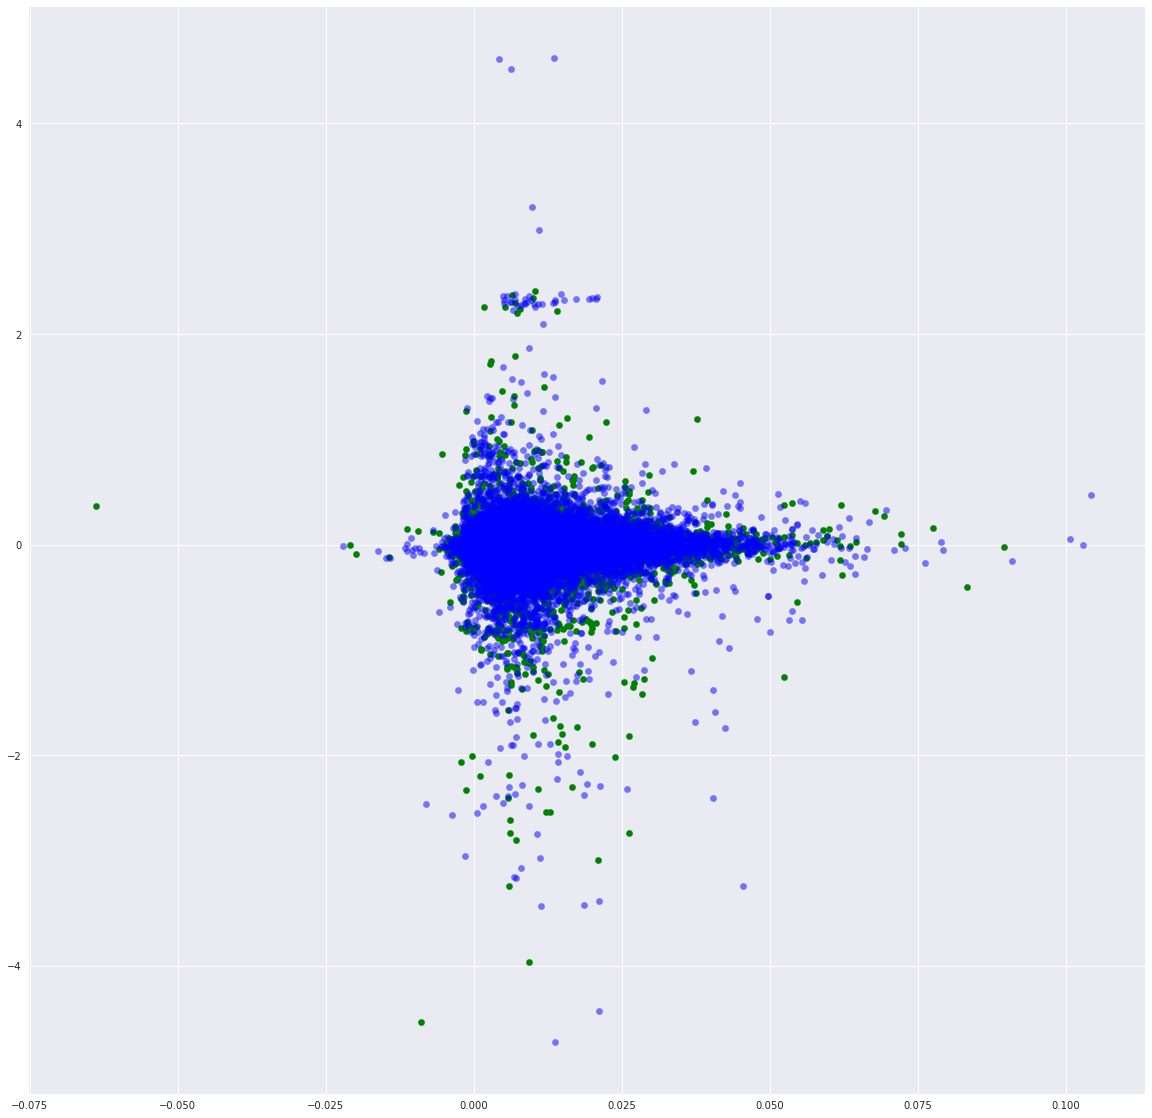

In [296]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
#pred_train = lm.predict(X_train)

print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train-lm.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test-lm.predict(X_test)) ** 2))
#model = lm.fit(X, y)
#predictions = lm.predict()
sns.set()
plt.figure(figsize=(20, 20))
plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40)
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
print(r2_score(y_test, predictions))
#plt.hlines(y=0, xmin=0, xmax=50)

[ 0.01115909  0.00904576  0.01274409 ...,  0.00997034  0.01485742
  0.01300825]


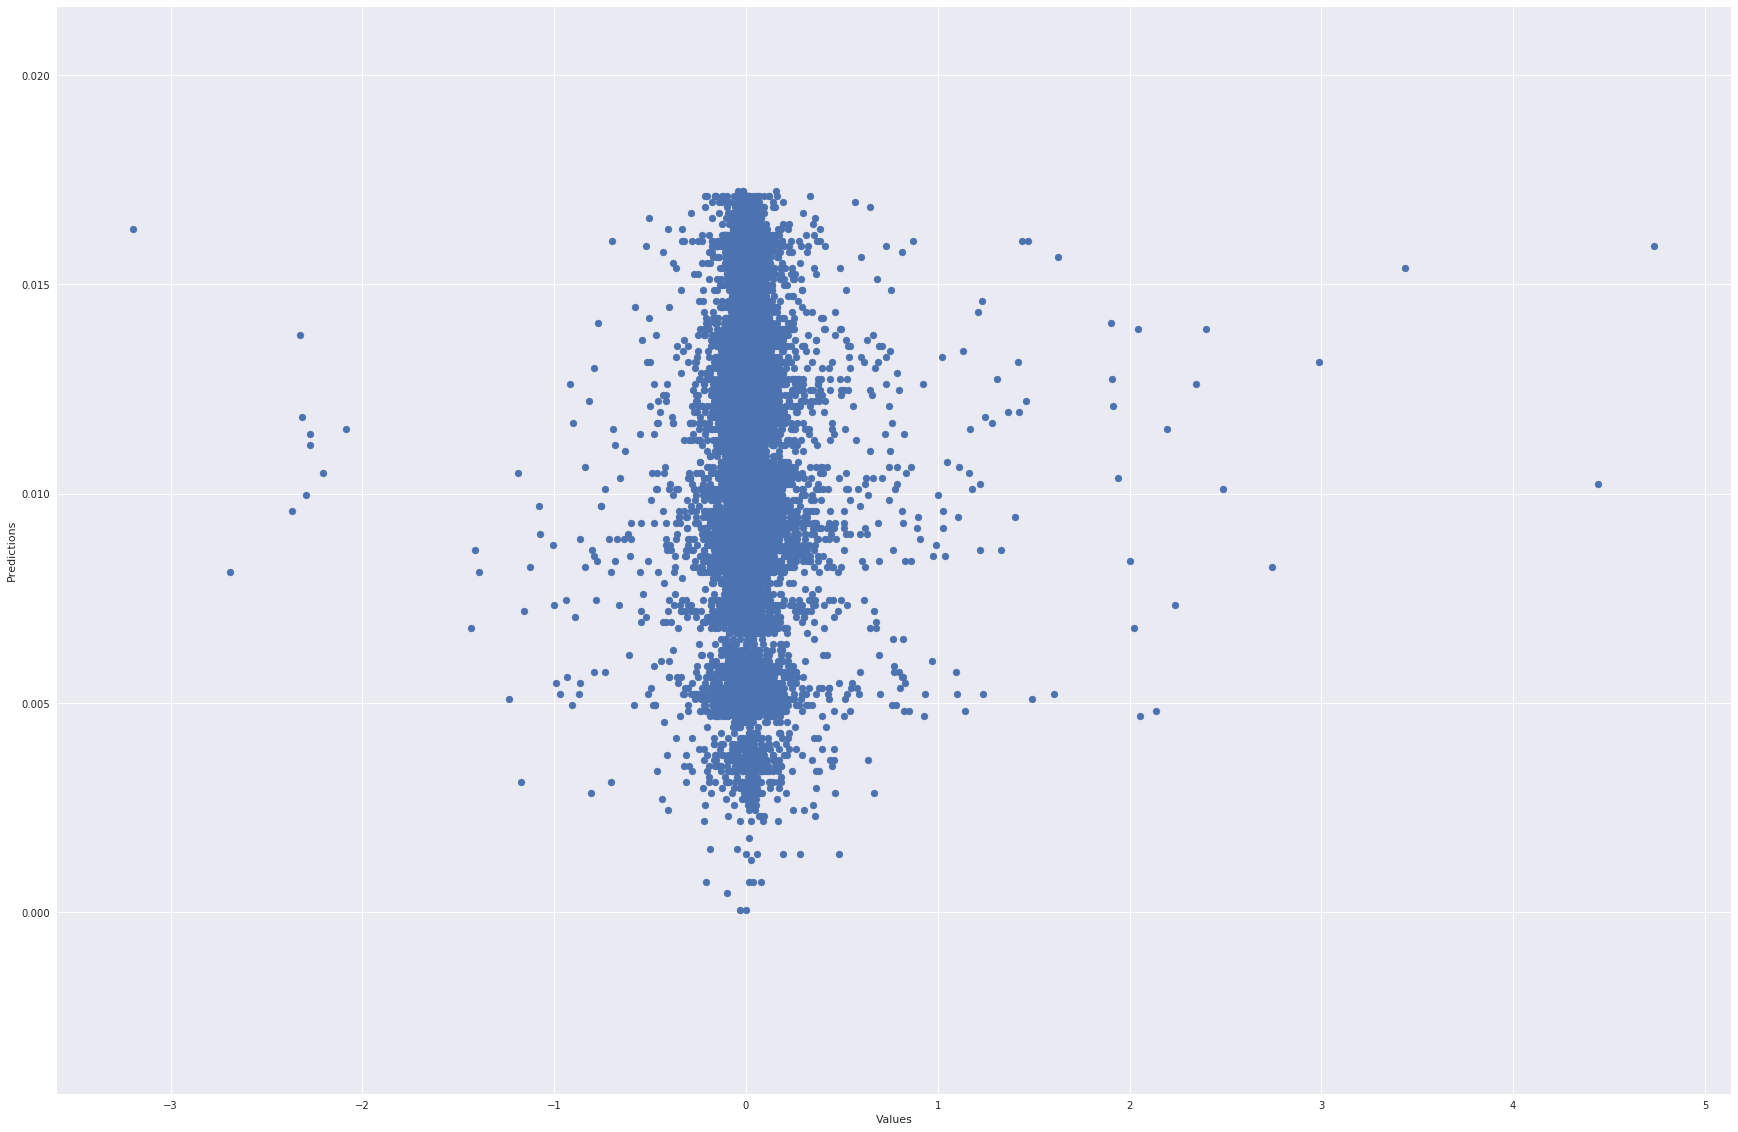

In [272]:
## The line / model
import matplotlib.pyplot as plt
print(predictions)
sns.set()
plt.figure(figsize=(30, 20))
plt.scatter(y_test, predictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

In [164]:
r2_score(y_train, y_test)

NameError: name 'r2_score' is not defined

In [195]:
from sklearn.metrics import r2_score

In [196]:
r2_score(y_test, predictions)

1.0

In [180]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [184]:
for train_index, test_index in kf.split(X):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
('TRAIN:', np.array([2, 3]), 'TEST:', np.array([0, 1]))
('TRAIN:', np.array([0, 1]), 'TEST:', np.array([2, 3]))

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

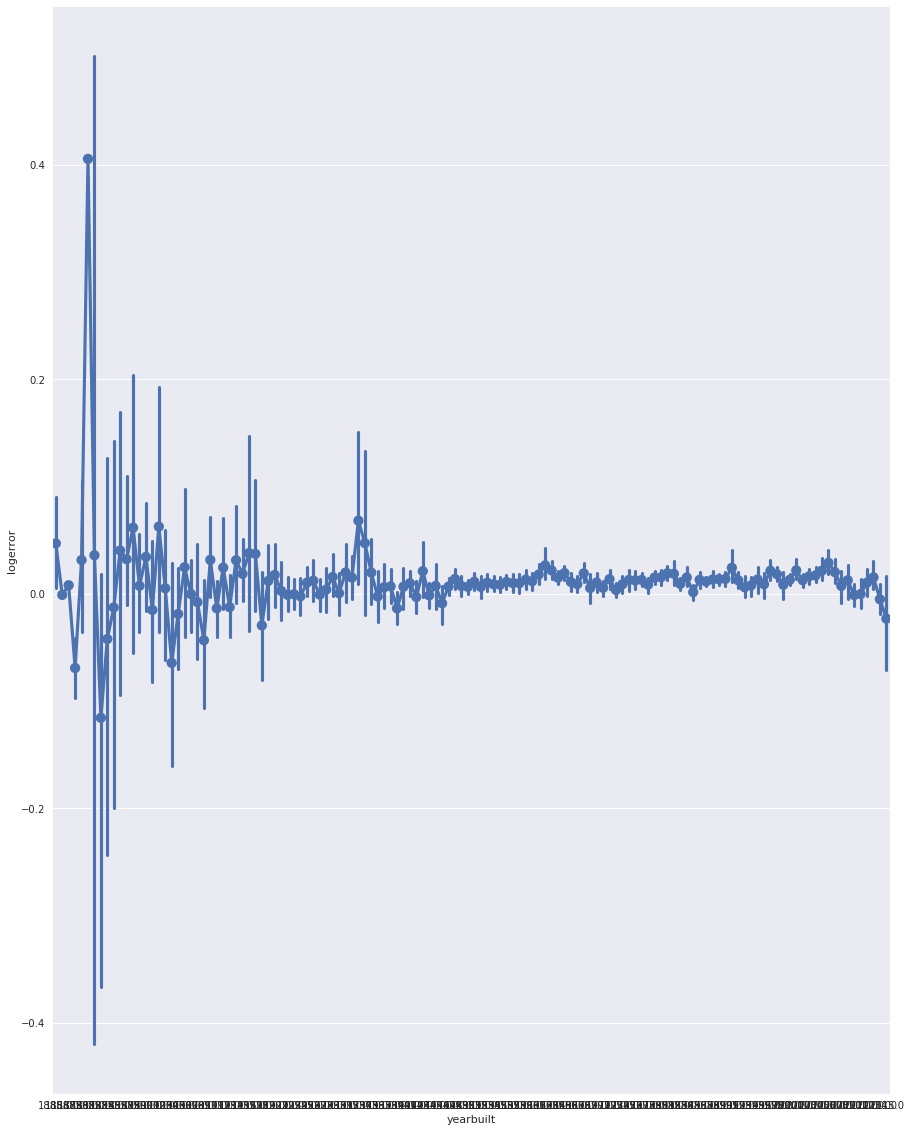

In [199]:
sns.set()
plt.figure(figsize=(15, 20))
ax = sns.pointplot(x="yearbuilt", y="logerror", data=df_merge)

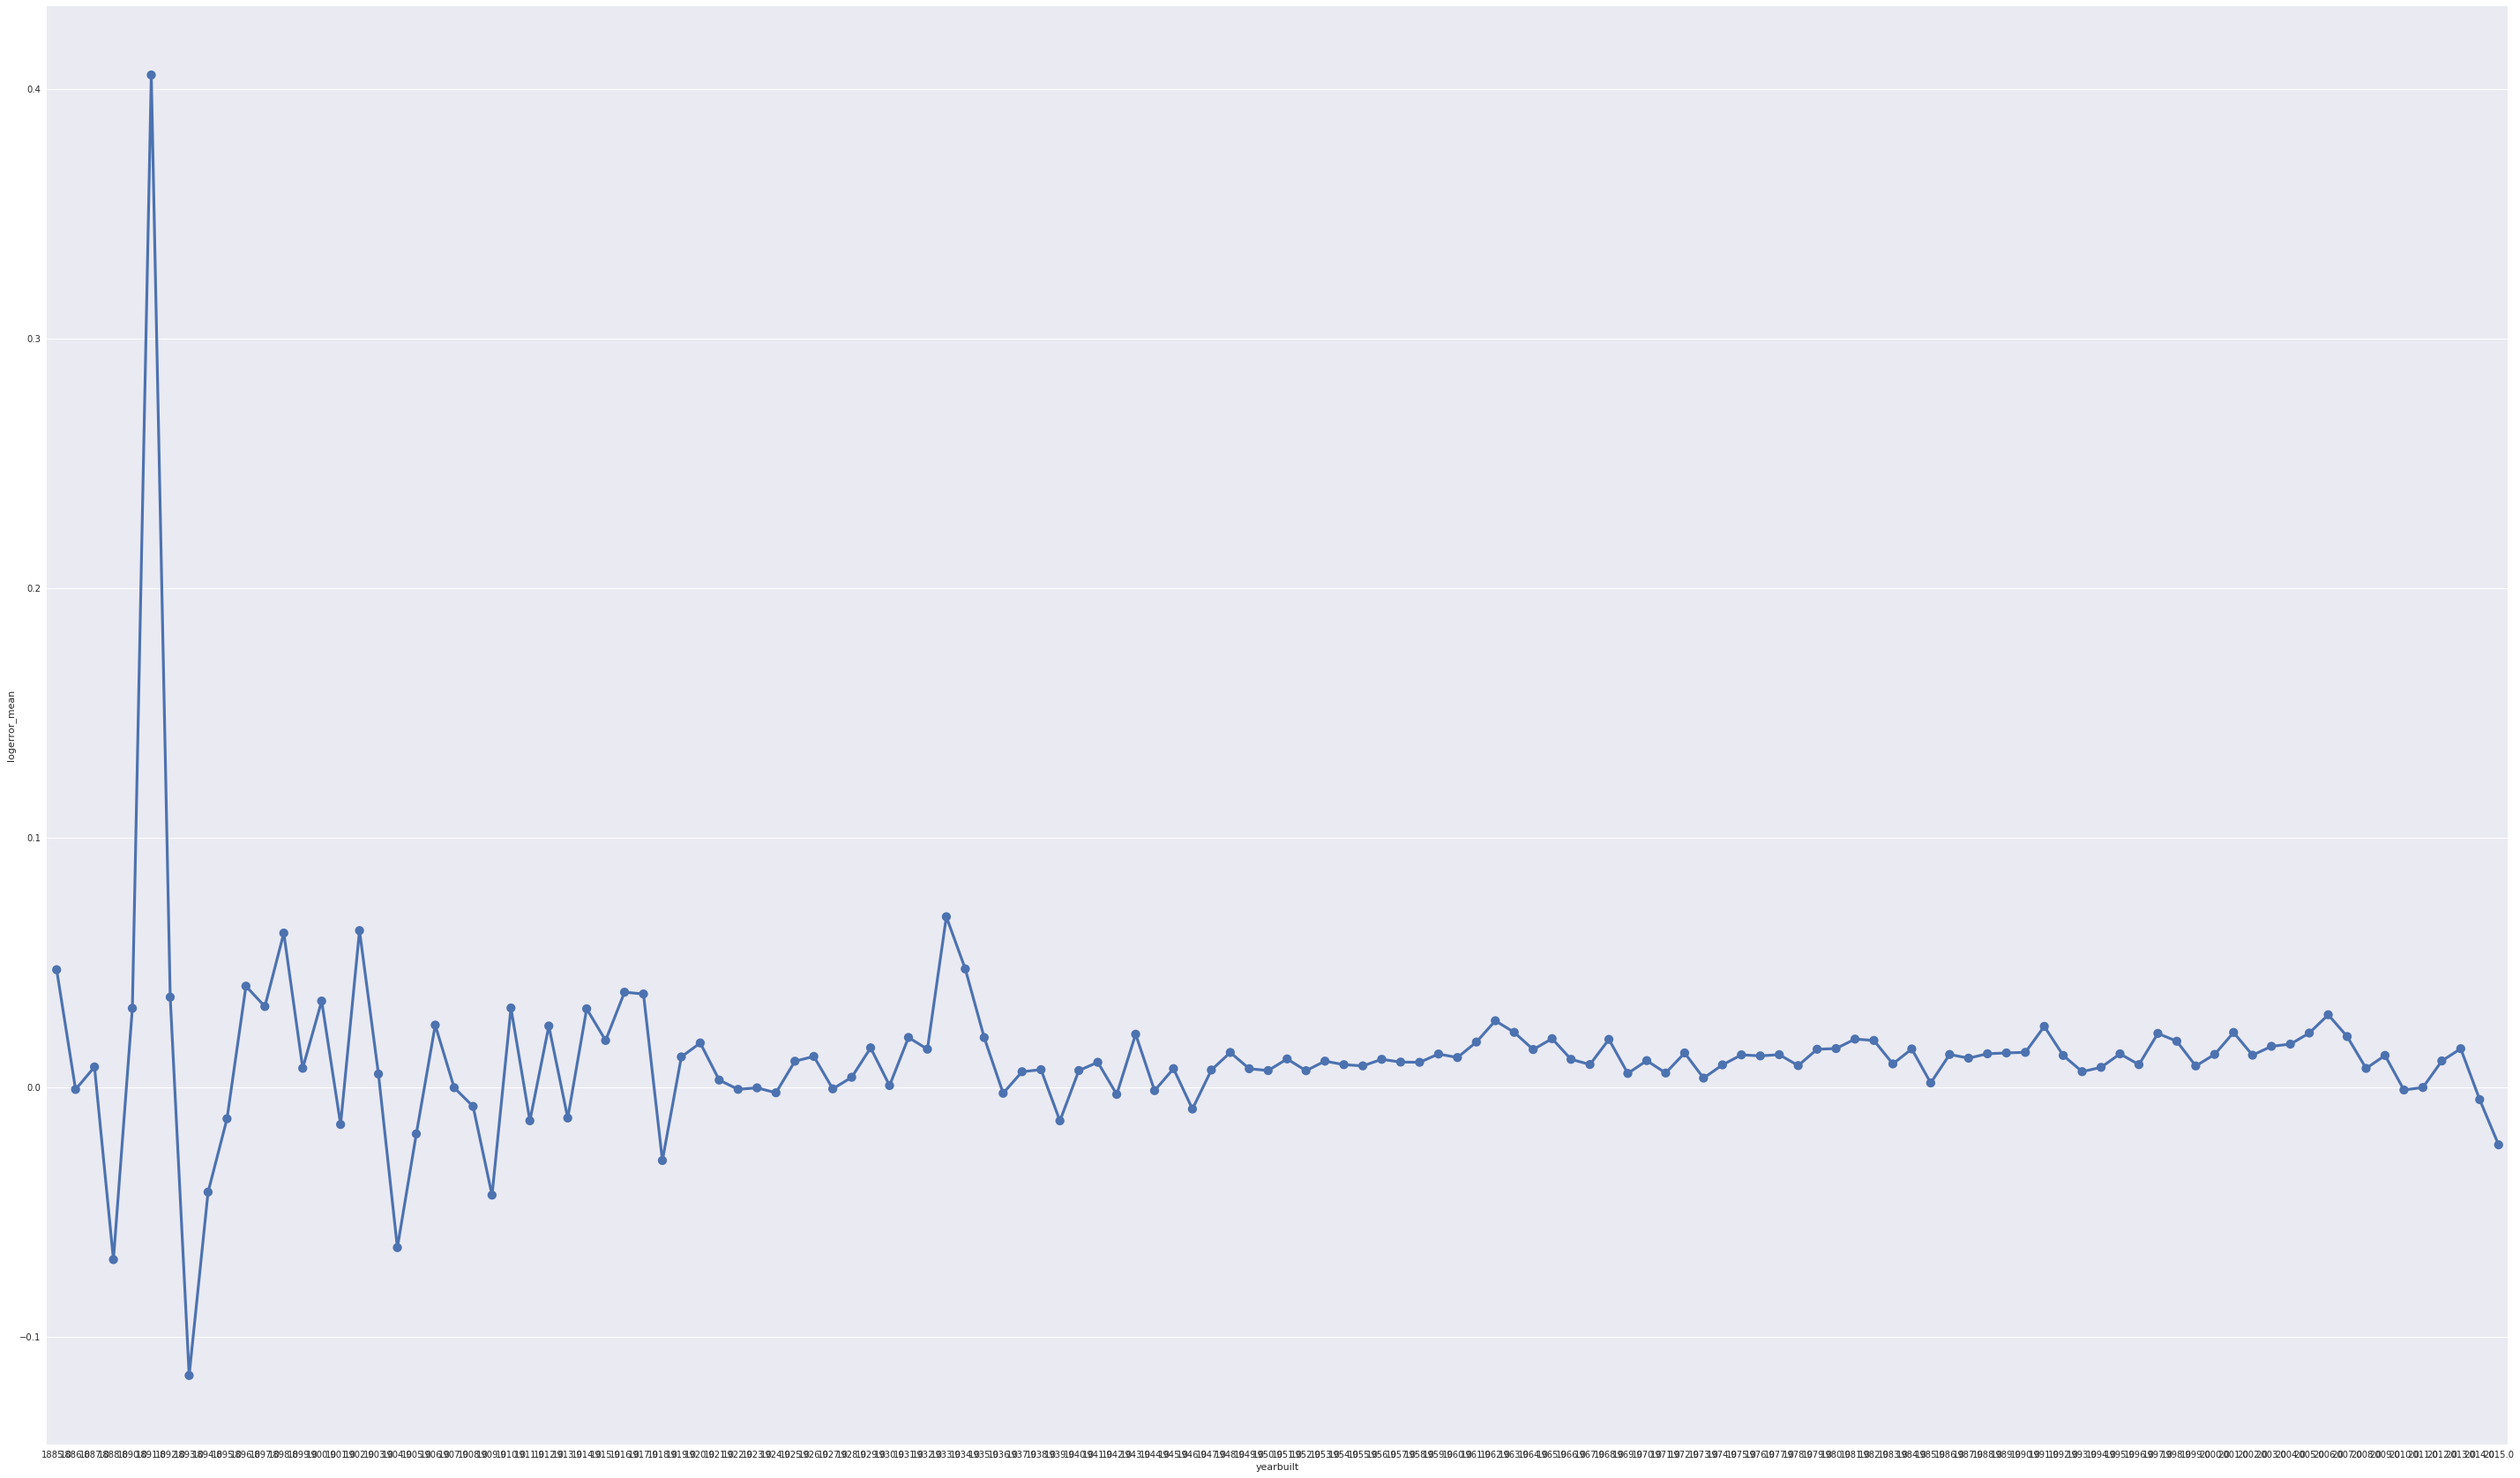

In [227]:
import numpy as np
import matplotlib.pyplot as plt
d = df_merge.groupby('yearbuilt')['logerror']
log_error_list = []
year_built_list = []
for name, group in d:
    #print(name)
    year_built_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(np.mean(temp_list))
pointplotdf = pd.DataFrame(np.column_stack([year_built_list, log_error_list]), 
                               columns=['yearbuilt', 'logerror_mean'])
sns.set()
plt.figure(figsize=(50, 30))
ax = sns.pointplot(x="yearbuilt", y="logerror_mean", data=pointplotdf)

[1.0, 4.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0]


/home/vaibhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


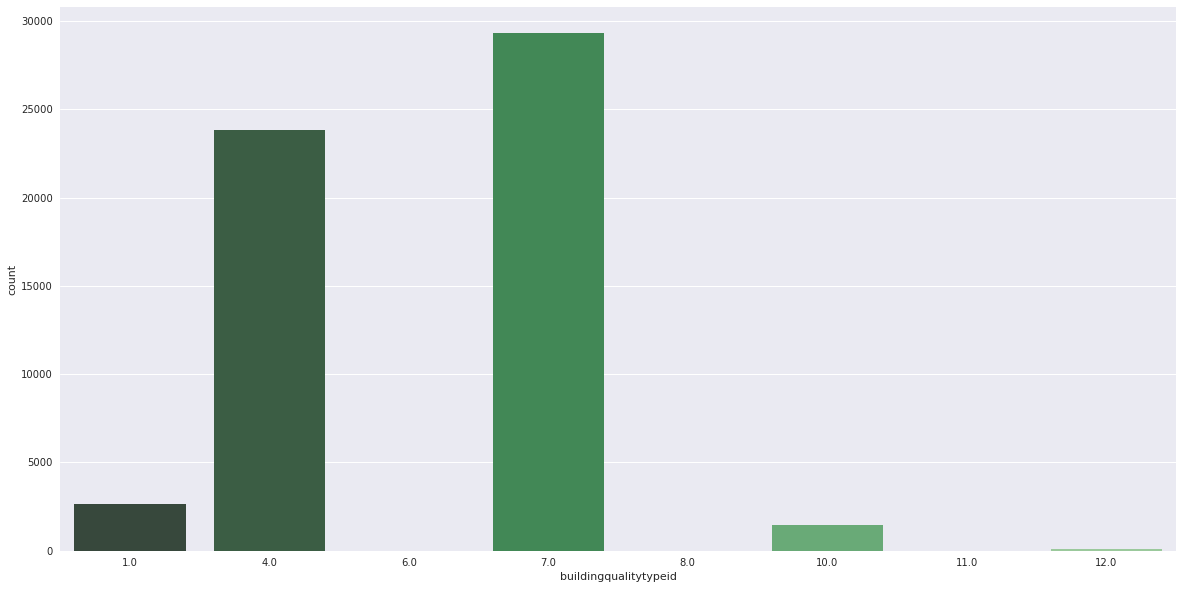

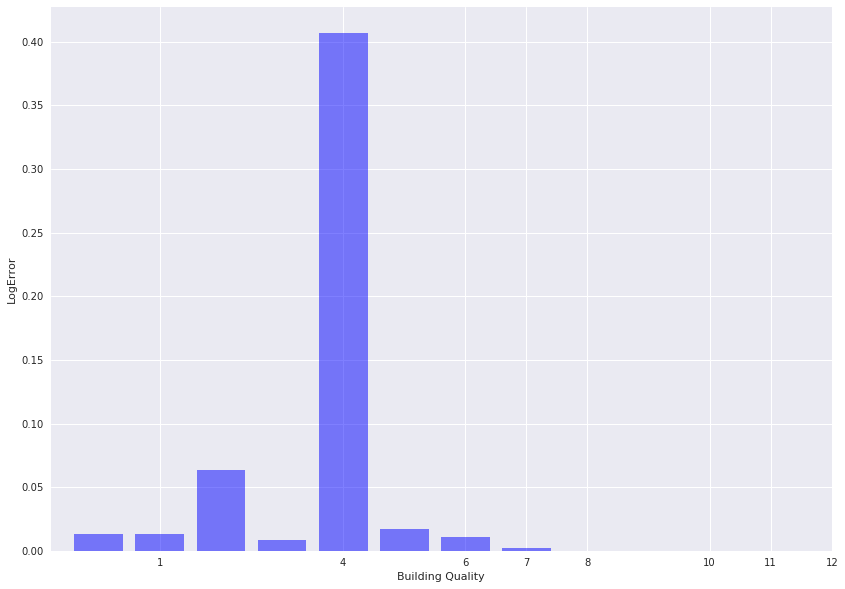

In [225]:
import numpy as np
import matplotlib.pyplot as plt
d = df_merge.groupby('buildingqualitytypeid')['logerror']
log_error_list = []
building_quality_list = []
for name, group in d:
    building_quality_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(np.mean(temp_list))
print(building_quality_list)

sns.set()
plt.figure(figsize=(20, 10))
sns.countplot(x="buildingqualitytypeid", data=df_merge, palette="Greens_d");

f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
ax1.bar(range(len(log_error_list)), log_error_list, alpha=0.5, color='b')
plt.sca(ax1)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xticks(building_quality_list)
ax1.set_ylabel("LogError")
ax1.set_xlabel("Building Quality")
plt.legend(loc="upper right")
plt.show()

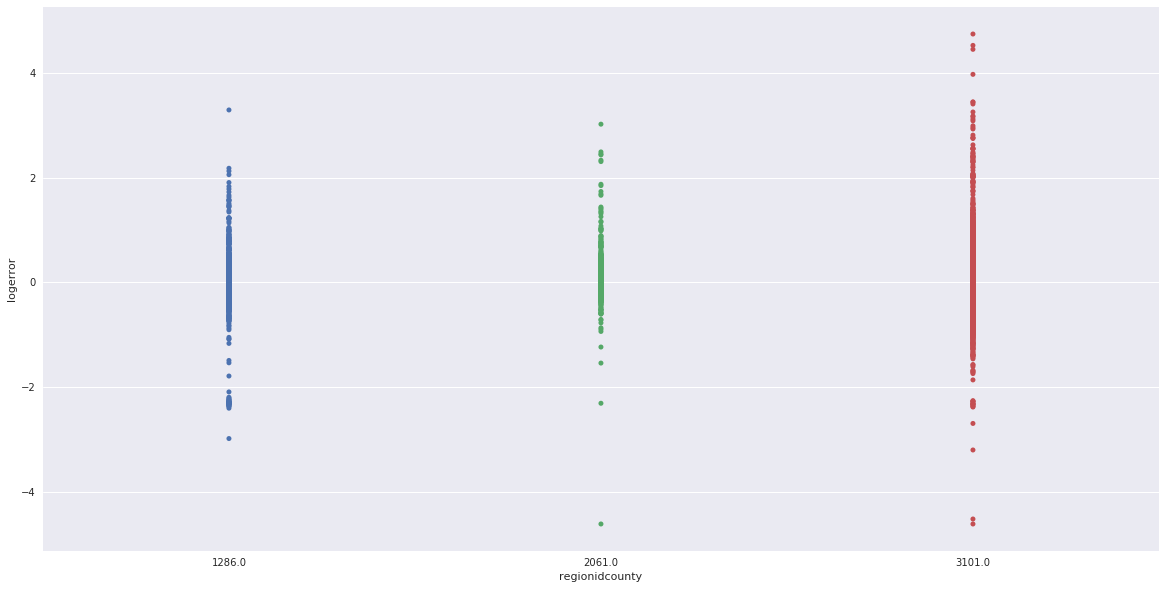

In [221]:
d = df_merge.groupby('regionidcounty')['logerror']
log_error_list = []
region_id_county_list = []
for name, group in d:
    #print(name)
    region_id_county_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(temp_list)
scatterplotdf = pd.DataFrame(np.column_stack([region_id_county_list, log_error_list]), 
                               columns=['regionidcounty', 'logerror'])
sns.set()
plt.figure(figsize=(20, 10))
sns.stripplot(x="regionidcounty", y="logerror", data=df_merge)

In [228]:
import numpy as np
import matplotlib.pyplot as plt
d = df_merge.groupby('buildingqualitytypeid')['logerror']
log_error_list = []
building_quality_list = []
for name, group in d:
    building_quality_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(np.mean(temp_list))

buildingquality_val_count = df_merge['buildingqualitytypeid'].value_counts()

#sns.set()
#plt.figure(figsize=(20, 10))
#sns.countplot(x="buildingqualitytypeid", data=df_merge, palette="Greens_d");

#f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
#fig = plt.figure() # Create matplotlib figure

#ax1 = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

#width = 0.4



#ax1.bar(range(len(log_error_list)), log_error_list, alpha=0.5, color='b')
#plt.sca(ax1)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
#plt.xticks(building_quality_list)
#ax1.set_ylabel("LogError")
#ax1.set_xlabel("Building Quality")
#plt.legend(loc="upper right")
#plt.show()



#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

#ax.set_ylabel('Amount')
#ax2.set_ylabel('Price')

#plt.show()

In [230]:
type(buildingquality_val_count)


pandas.core.series.Series

In [231]:
buildingquality_val_list = buildingquality_val_count.tolist()
bardf = pd.DataFrame(np.column_stack([building_quality_list, log_error_list, buildingquality_val_list]), 
                               columns=['buildingqualitytypeid', 'logerror', 'buildingqualitytypeidcount'])

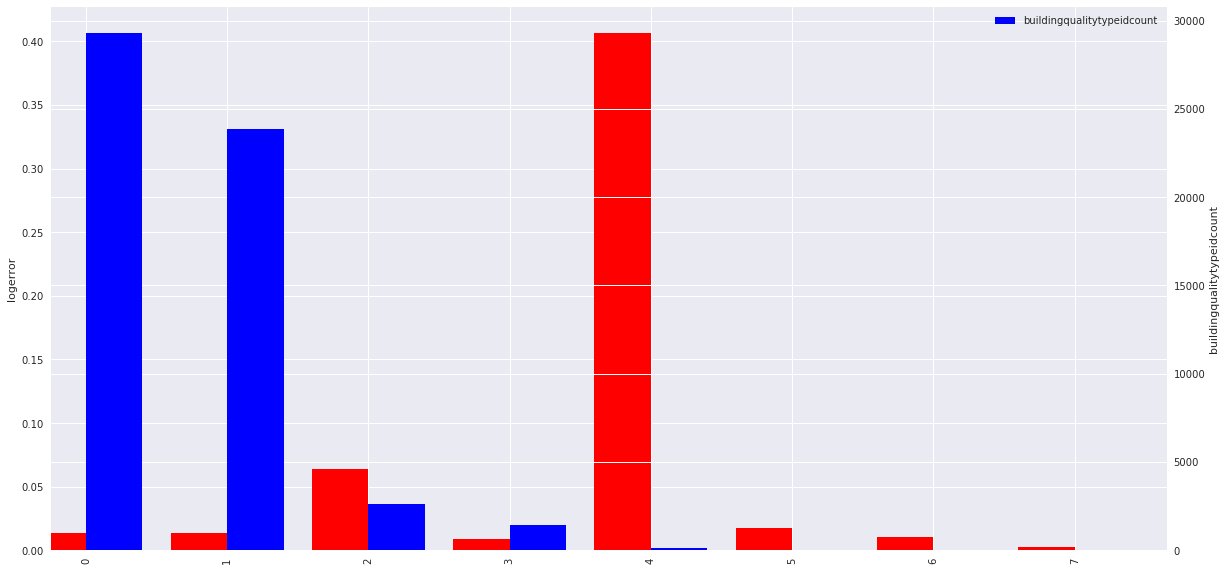

In [243]:
#df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

#sns.set()
#plt.figure(figsize=(20, 10))
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

bardf.logerror.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='logerror')
bardf.buildingqualitytypeidcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label = 'buildingqualitytypeidcount')
#plt.xticks(building_quality_list)
ax.set_ylabel('logerror')
plt.legend(loc="upper right")
ax2.set_ylabel('buildingqualitytypeidcount')
#plt.legend(loc="upper right")
plt.show()

(51326, 4) (51326,)
(34218, 4) (34218,)
Fit a model X_train, and calculate MSE with Y_train: 0.0250802021136
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0219825663562
0.00274848278607


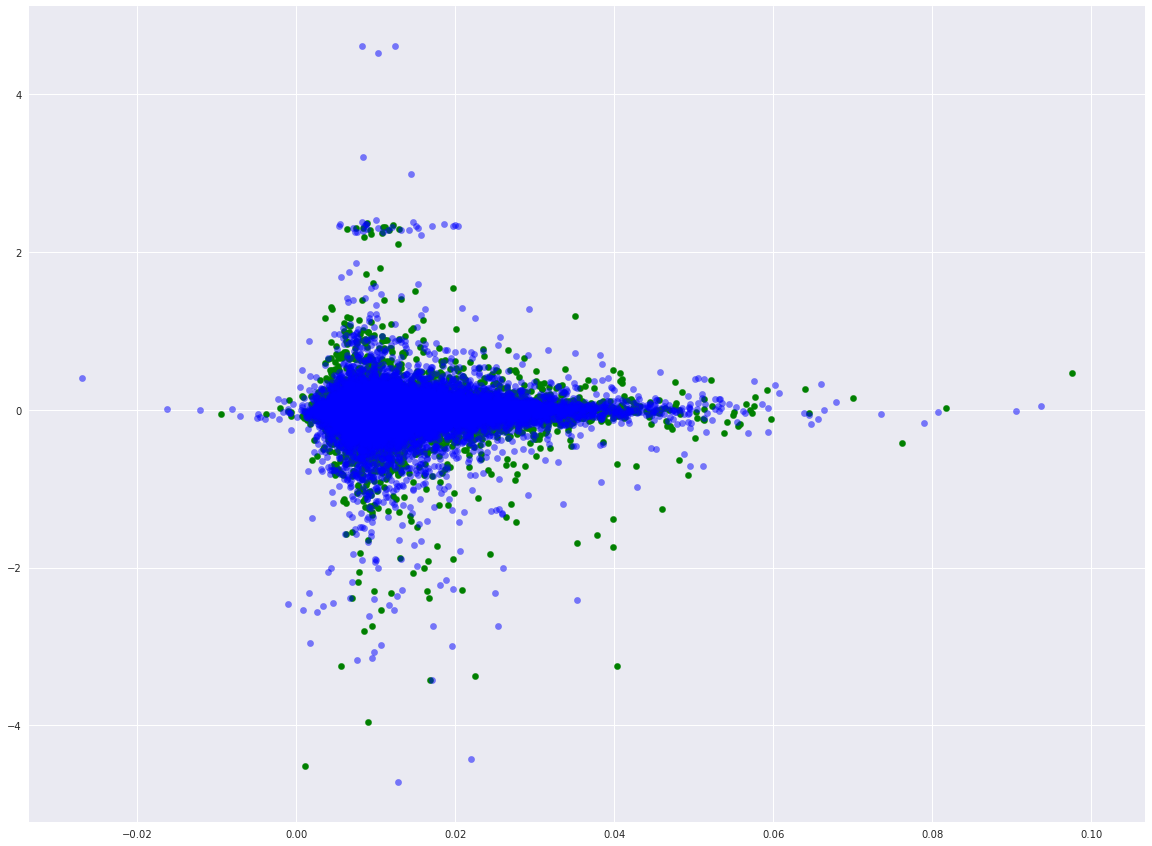

In [345]:
#df_linear_reg = df_merge[['yearbuilt', 'finishedsquarefeet12','structuretaxvaluedollarcnt','logerror']]
#df_linear_reg = df_merge[['yearbuilt', 'finishedsquarefeet12','logerror']]
df_linear_reg = df_merge[['bathroomcnt', 'finishedsquarefeet12','structuretaxvaluedollarcnt','bedroomcnt','logerror']]
#df_linear_reg = df_merge[['bathroomcnt','logerror']]


#df_final_reg = df_linear_reg[df_linear_reg.yearbuilt.notnull()]
df_final_reg = df_linear_reg[df_linear_reg.bathroomcnt.notnull()]
df_final_reg = df_final_reg[df_final_reg.finishedsquarefeet12.notnull()]
df_final_reg = df_final_reg[df_final_reg.structuretaxvaluedollarcnt.notnull()]
df_final_reg = df_final_reg[df_final_reg.bedroomcnt.notnull()]


#df_final_reg = df_final_reg[df_final_reg.basementsqft.notnull()]
df_final_reg
y = df_final_reg['logerror'].as_matrix()
X = df_final_reg.drop('logerror', axis=1)

#X_train, X_test, y_train, y_test = train_test_split(df_final_reg, y, test_size=0.3)
import sklearn
import scipy.stats as stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression(normalize=True)
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
#pred_train = lm.predict(X_train)

print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train-lm.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test-lm.predict(X_test)) ** 2))
#model = lm.fit(X, y)
#predictions = lm.predict()
sns.set()
plt.figure(figsize=(20, 15))
plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40)
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
print(r2_score(y_test, predictions))

In [305]:
overall_correlation = df_merge.corr()

In [306]:
overall_correlation

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,1.000000,0.588425,-0.047806,0.294147,-0.014073,0.004971,NaN,0.121008,-0.002608,NaN,...,0.167428,0.029649,0.008460,0.003840,NaN,0.001010,-0.030728,0.033895,0.676362,0.004837
airconditioningtypeid,0.588425,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,NaN,...,-0.074885,0.234819,-0.047324,-0.001102,NaN,0.027169,-0.028251,0.076337,0.797531,0.005179
architecturalstyletypeid,-0.047806,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,NaN,...,0.009546,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332,-0.004276
basementsqft,0.294147,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,NaN,...,0.610367,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869,0.253395
bathroomcnt,-0.014073,-0.037479,-0.003398,0.392206,1.000000,0.646120,NaN,-0.259748,1.000000,NaN,...,0.368061,0.320834,0.586641,0.476363,NaN,0.353806,0.461900,0.046710,0.013078,0.027889
bedroomcnt,0.004971,0.075327,0.071646,0.554301,0.646120,1.000000,NaN,-0.025736,0.618060,NaN,...,0.040871,0.150591,0.305405,0.241329,NaN,0.173205,0.239118,0.023705,0.028170,0.025467
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,0.121008,0.008108,NaN,NaN,-0.259748,-0.025736,NaN,1.000000,-0.259258,NaN,...,-0.424891,0.388514,-0.105382,-0.046708,NaN,-0.011348,-0.042005,-0.007968,-0.044472,-0.009573
calculatedbathnbr,-0.002608,-0.034114,-0.003398,0.394347,1.000000,0.618060,NaN,-0.259258,1.000000,NaN,...,0.369543,0.369760,0.611665,0.497763,NaN,0.371634,0.487320,0.046273,0.031270,0.029448
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


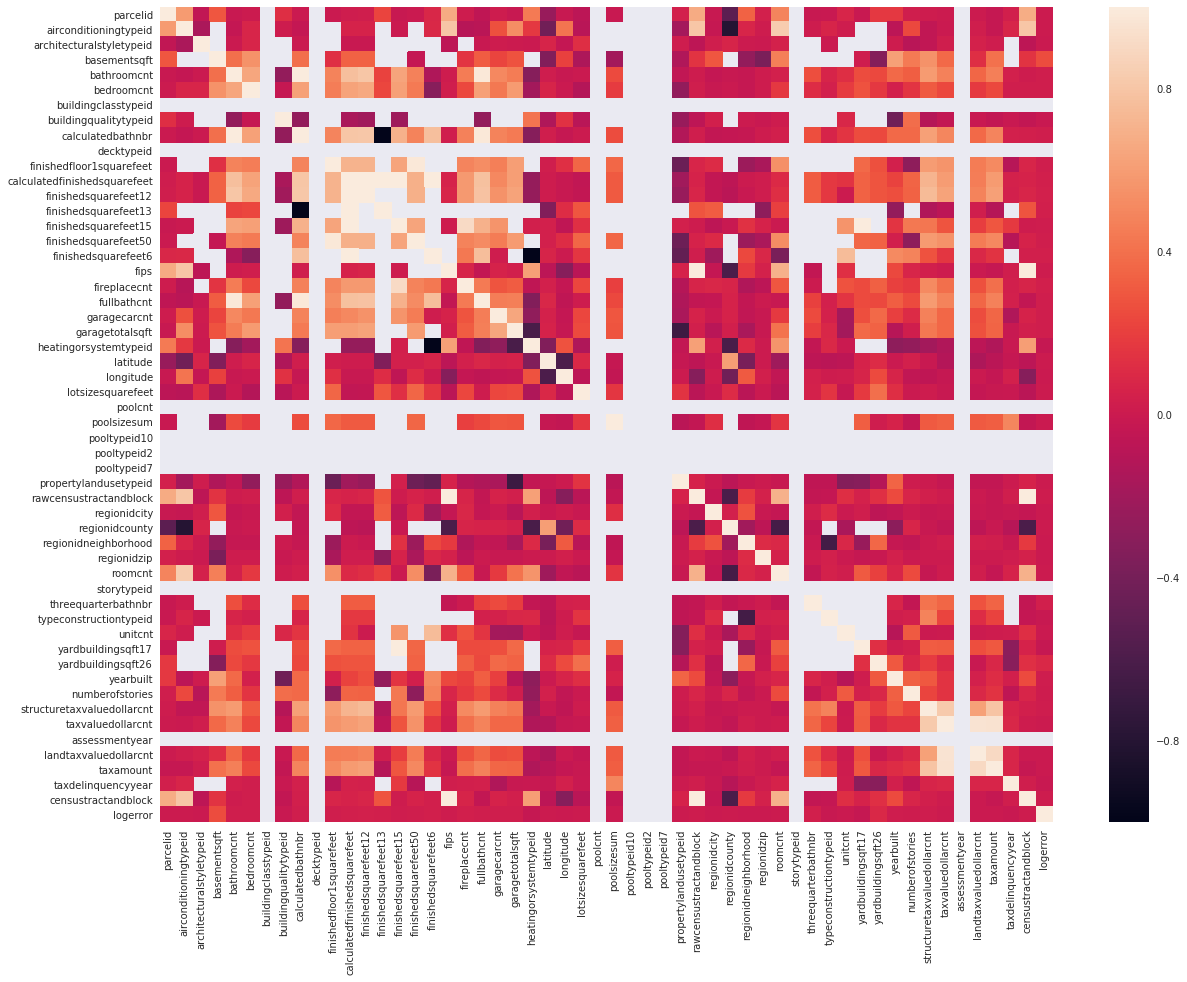

In [308]:
sns.set()
plt.figure(figsize=(20, 15))
heatmap_interesting_vars = sns.heatmap(overall_correlation)

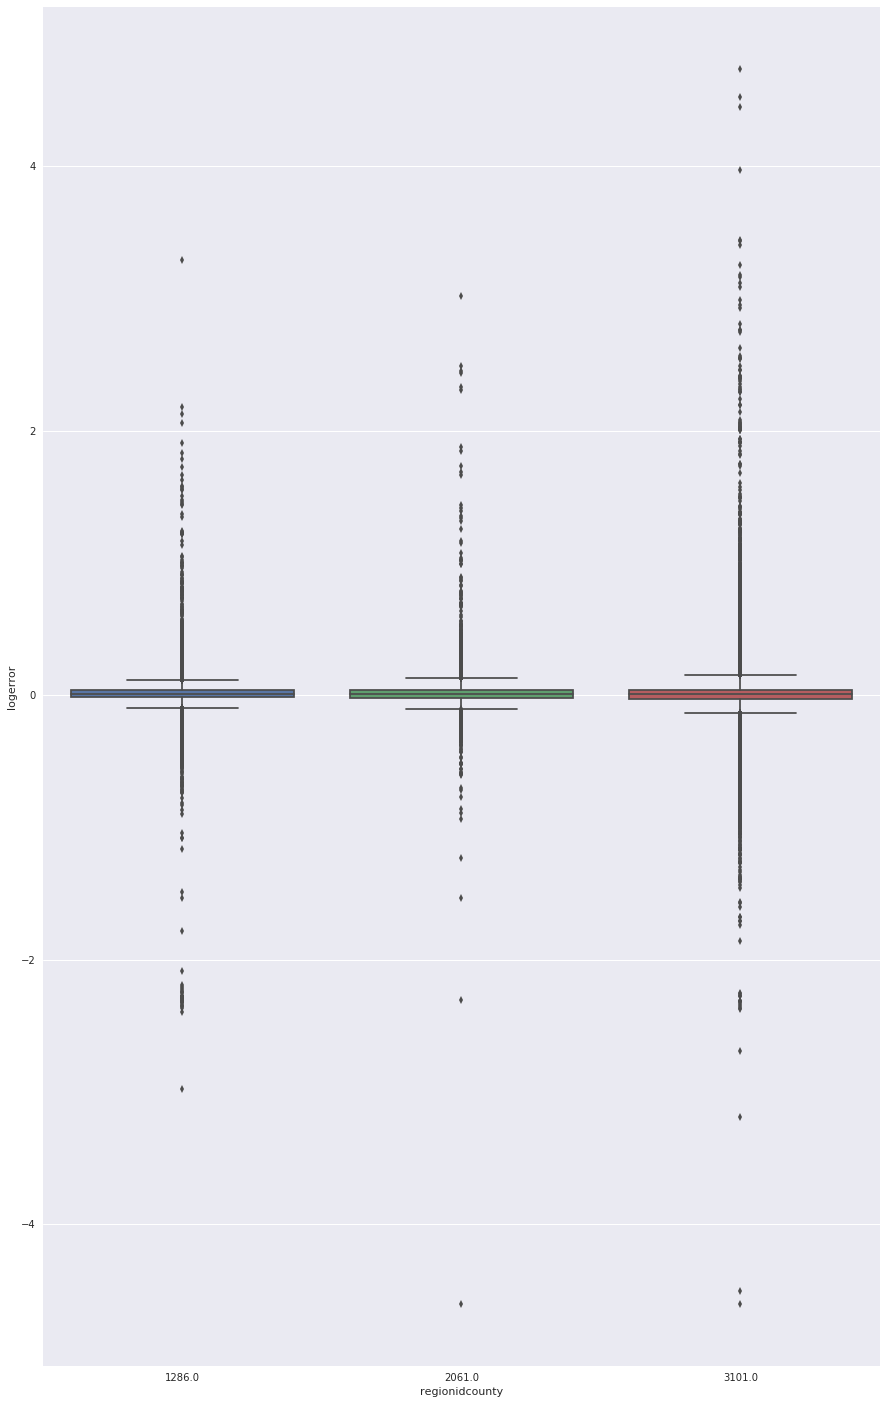

In [310]:
sns.set()
plt.figure(figsize=(15, 25))
ax = sns.boxplot(x="regionidcounty", y="logerror", data=df_merge)

In [318]:
rows = overall_correlation.shape[0]
cols = overall_correlation.shape[1]
for x in range(0, rows):
    for y in range(0, cols):
        overall_correlation[x,y]
        #if(overall_correlation[x,y] > 0.6):
         #   print('x is: ', x, ' and y is: ', y, ' and value is: ', overall_correlation[x,y])

KeyError: (0, 0)